*note:
- Các bạn sinh viên làm lại trên cả hai bộ dữ liệu movie và book
- Tải cái notebook này về rồi up lên drive của các bạn sài nhé, đừng có ghi trực tiếp lên file của Thầy

Tên: Nguyen Thi Huyen Trang

MSSV: 21520488



In [ ]:
!pip install -q opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sn
import tqdm

In [ ]:
od.download("https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tranghnguyn
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset


100%|██████████| 24.3M/24.3M [00:00<00:00, 83.6MB/s]


In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2024-09-19 13:12:13--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.28MB/s    in 0.7s    

2024-09-19 13:12:15 (1.28 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
!unzip -q /content/ml-latest-small.zip -d /content/movies

#movie


In [ ]:
# load dữ liệu từ file ratings, movies
ratings = pd.read_csv("/content/movies/ml-latest-small/ratings.csv")
movies = pd.read_csv("/content/movies/ml-latest-small/movies.csv")

In [ ]:
# xem 1 cột trên file ratings
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# xem nhiều cột trên file ratings
ratings[['userId', 'movieId', 'rating']].head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
# chọn ra các lượt rating > 3.5
ratings.loc[ratings['rating'] > 3.5]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [ ]:
# chọn ra các lượt rating cho bộ phim có id = 100
ratings.loc[ratings['movieId'] == 100]

,userId,movieId,rating,timestamp
605,6,100,3.0,845555151
4947,32,100,4.0,856736290
13097,84,100,3.0,860396882
25993,181,100,3.0,845470909
26118,182,100,3.0,1055153511
29961,207,100,3.0,1258548270
44470,297,100,1.0,900872461
48603,314,100,3.0,847175533
51919,337,100,3.0,860255992
68381,444,100,3.0,839310140


In [ ]:
# chọn ra các lượt rating của user có id là 350
ratings.loc[ratings['userId'] == 350]

,userId,movieId,rating,timestamp
53017,350,1,4.0,864940931
53018,350,7,3.0,864941017
53019,350,12,3.0,864941118
53020,350,17,2.0,864940932
53021,350,32,4.0,864940930
53022,350,65,3.0,864941118
53023,350,95,3.0,864940931
53024,350,112,3.0,864941018
53025,350,141,3.0,864940931
53026,350,260,4.0,864940972


In [ ]:
# Thêm một cột "birthday" vào dataframe ratings với giá trị ngẫu nhiên cho từng hàng là 1960 đến 2010
ratings['birthday'] = np.random.randint(1960, 2010, ratings.shape[0])
ratings.head()

,userId,movieId,rating,timestamp,birthday
0,1,1,4.0,964982703,2006
1,1,3,4.0,964981247,1974
2,1,6,4.0,964982224,1993
3,1,47,5.0,964983815,1990
4,1,50,5.0,964982931,1981


In [ ]:
# thêm côt "is_old" vào dataframe ratings với giá trị True nếu năm <1990 và false nếu ngược lại
ratings['is_old'] = [True if year < 1990 else False for year in ratings['birthday']]
ratings.head()


,userId,movieId,rating,timestamp,birthday,is_old
0,1,1,4.0,964982703,2006,False
1,1,3,4.0,964981247,1974,True
2,1,6,4.0,964982224,1993,False
3,1,47,5.0,964983815,1990,False
4,1,50,5.0,964982931,1981,True


In [ ]:
# Xoá hai cột vừa tạo ở trên
ratings.drop(['birthday', 'is_old'], axis=1, inplace=True)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# đếm số lượng rating cho từng giá trị rating 0.5 -> 5
ratings['rating'].value_counts()

,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


<Axes: xlabel='rating', ylabel='count'>

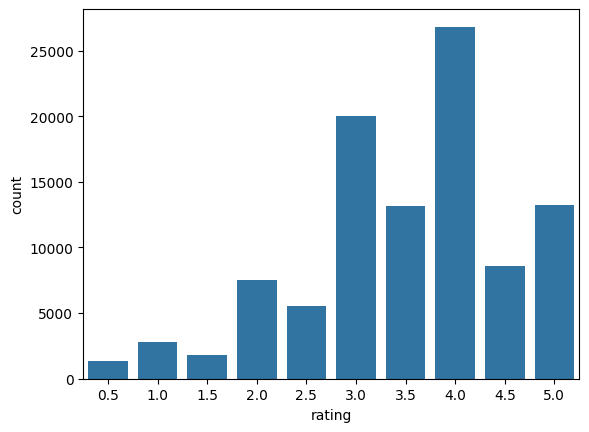

In [ ]:
# Vẽ biểu đồ cột thể hiện số lượng cho từng giá trị ratings trên
sn.countplot(x='rating', data=ratings)

In [ ]:
# sắp xếp danh sách ratings theo chiều tăng dần, giảm dần theo giá trị rating
ratings.sort_values(['rating'], ascending=True)

,userId,movieId,rating,timestamp
3752,22,53519,0.5,1268727137
60861,393,5445,0.5,1430506636
47025,307,2017,0.5,1186173639
22446,153,1198,0.5,1525548264
60865,393,5902,0.5,1430507509
...,...,...,...,...
90260,587,50,5.0,953141366
90261,587,58,5.0,953141592
17061,108,5303,5.0,1042839719
90266,587,236,5.0,953139541


In [ ]:
ratings.sort_values(['rating'], ascending=False)

,userId,movieId,rating,timestamp
34031,232,3147,5.0,1218164903
50717,328,1080,5.0,1494210450
18166,115,487,5.0,944951378
18165,115,480,5.0,944953733
76157,479,3308,5.0,1039362558
...,...,...,...,...
99278,608,4679,0.5,1117506642
99277,608,4678,0.5,1117506202
95668,600,4744,0.5,1237714406
99269,608,4621,0.5,1117506916


In [ ]:
# đếm xem có bao nhiều người tham gia đánh giá
ratings['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# Đếm xem có bao nhiêu bộ phim được đánh giá
ratings['movieId'].unique()

array([     1,      3,      6, ..., 160836, 163937, 163981])

In [ ]:
# Tính xem trung bình mỗi người rating bao nhiêu bộ phim
ratings.groupby('userId').count()['movieId'].mean()

165.30491803278687

In [ ]:
# Tính xem mỗi bộ phim có bao nhiêu lượt rating
ratings.groupby('movieId').count()['rating']

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [ ]:
# groupby bảng ratings theo "movieId" và tính rating trung bình cho từng bộ phim
ratings.groupby('movieId')['rating'].mean()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [ ]:
# Tìm tên 5 bộ phim có rating trung bình thấp nhất
lowest_idx = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=True).head().index.values

movies.loc[movies['movieId'].isin(lowest_idx)]['title']

,title
2689,Gypsy (1962)
4881,"Follow Me, Boys! (1966)"
5554,Lionheart (1990)
7297,Case 39 (2009)
9117,Idaho Transfer (1973)


In [ ]:
# Tìm tên 5 bộ phim có rating trung bình cao nhất
highest_idx = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head().index.values

movies.loc[movies['movieId'].isin(highest_idx)]['title']

,title
7656,Paper Birds (Pájaros de papel) (2010)
8107,"Act of Killing, The (2012)"
9083,Jump In! (2007)
9094,Human (2015)
9096,L.A. Slasher (2015)


In [ ]:
# merge bảng ratings, và movies theo cột "movieID"
joined_table = ratings.merge(movies, on='movieId')
joined_table.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
ratings['movieId'].unique()

array([     1,      3,      6, ..., 160836, 163937, 163981])

In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "userId" và các hàng là "movieId" (*)
pivot = ratings.pivot(index='movieId' , columns="userId", values="rating").fillna(0)
pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# chuyển (*) sang numpy.ndarray (như ma trân rating) (**)
pivoted_mtr = pivot.to_numpy()
pivoted_mtr

array([[4. , 0. , 0. , ..., 2.5, 3. , 5. ],
       [0. , 0. , 0. , ..., 2. , 0. , 0. ],
       [4. , 0. , 0. , ..., 2. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
# Nhân ma ma trận trên với 2
pivoted_mtr * 2

array([[ 8.,  0.,  0., ...,  5.,  6., 10.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 8.,  0.,  0., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# Cộng ma ma trận trên với 3
pivoted_mtr + 3

array([[7. , 3. , 3. , ..., 5.5, 6. , 8. ],
       [3. , 3. , 3. , ..., 5. , 3. , 3. ],
       [7. , 3. , 3. , ..., 5. , 3. , 3. ],
       ...,
       [3. , 3. , 3. , ..., 3. , 3. , 3. ],
       [3. , 3. , 3. , ..., 3. , 3. , 3. ],
       [3. , 3. , 3. , ..., 3. , 3. , 3. ]])

In [ ]:
# lấy ra dòng đầu tiên trong (*) và chuyển sang numpy.ndarray (như vector cho movieId = 1)
mtr1 = pivot.iloc[1].to_numpy()
mtr1

array([0. , 0. , 0. , 0. , 0. , 4. , 0. , 4. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 3. , 3. , 3. , 3.5, 0. , 0. , 0. , 0. , 0. ,
       4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. ,
       0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. ,
       0. , 5. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 3. ,
       0. , 0. , 5. , 0. , 0. , 0. , 0. , 1.5, 0. , 0. , 0. , 0. , 3. ,
       0. , 0. , 0. , 0. , 4. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. ,
       3. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 2. , 0. , 0. , 0. ,
       0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. , 0.

In [ ]:
# lấy ra dòng thứ 2 trong (*) và chuyển sang numpy.ndarray (như vector cho movieId = 2)
mtr2 = pivot.iloc[2].to_numpy()
mtr2

array([4. , 0. , 0. , 0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 4. , 5. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. ,
       0. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. ,
       0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 5. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5, 3. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 3. , 3. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 5. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0.

In [ ]:
# tính tích vô hướng của hai vector trên
mtr1 @ mtr2

259.0

In [ ]:
# tính giá trị cosine giữa hai vector trên
from scipy.linalg import norm
(mtr1 @ mtr2) / (norm(mtr1) * norm(mtr2))

0.28243799332707586

In [ ]:
# tích của vector movieId = 1 với ma trận (**)
pivoted_mtr @ mtr1

array([ 896.5 , 1380.25,  259.  , ...,    0.  ,    0.  ,    0.  ])

In [ ]:
mtr1 * pivoted_mtr

array([[0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Book dataset

In [ ]:
# load dữ liệu từ file ratings, books
book_ratings = pd.read_csv("/content/book-recommendation-dataset/Ratings.csv")
books = pd.read_csv("/content/book-recommendation-dataset/Books.csv")

<ipython-input-11-59b2b3d005fe>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/book-recommendation-dataset/Books.csv")


In [ ]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(0).astype(int)

In [ ]:
# xem thông tin file ratings
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# xem 1 cột "User-ID" trên file ratings
book_ratings['User-ID']

,User-ID
0,276725
1,276726
2,276727
3,276729
4,276729
...,...
1149775,276704
1149776,276706
1149777,276709
1149778,276721


In [ ]:
# xem cột "ISBN" và "Book-Rating" trên file ratings
book_ratings[['ISBN', 'Book-Rating']]

,ISBN,Book-Rating
0,034545104X,0
1,0155061224,5
2,0446520802,0
3,052165615X,3
4,0521795028,6
...,...,...
1149775,1563526298,9
1149776,0679447156,0
1149777,0515107662,10
1149778,0590442449,10


In [ ]:
# chọn ra các lượt rating > 5
book_ratings.loc[book_ratings['Book-Rating'] > 5]

,User-ID,ISBN,Book-Rating
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10
...,...,...,...
1149771,276704,0743211383,7
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# chọn ra các lượt rating cho cuốn sách có id = 440414121
book_ratings.loc[book_ratings['ISBN'] == '440414121']

,User-ID,ISBN,Book-Rating


In [ ]:
# chọn ra các lượt rating của user có id là 276848
book_ratings.loc[book_ratings['User-ID'] == 276848]

,User-ID,ISBN,Book-Rating
224,276848,3423100424,0
225,276848,3442096596,0
226,276848,3442440777,0
227,276848,3453009304,0
228,276848,3453042905,0
229,276848,3453061187,0
230,276848,3453071174,0
231,276848,3453127013,0
232,276848,3453211014,0
233,276848,3462026062,8


In [ ]:
# thêm côt "is_new" vào dataframe ratings với giá trị True nếu Year-Of-Publication > 2000 và false nếu ngược lại
is_new = {}
for i in range(books.shape[0]):
    if int(books.iloc[i]['Year-Of-Publication']) > 2000:
        is_new[books.iloc[i]['ISBN']] = True
    else:
        is_new[books.iloc[i]['ISBN']] = False

In [ ]:
book_ratings['is_new'] = book_ratings['ISBN'].map(is_new)
book_ratings.head()

,User-ID,ISBN,Book-Rating,is_new
0,276725,034545104X,0,True
1,276726,0155061224,5,True
2,276727,0446520802,0,False
3,276729,052165615X,3,False
4,276729,0521795028,6,True


In [ ]:
# Xoá cột vừa tạo ở trên
book_ratings.drop(['is_new'], axis=1, inplace=True)
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# đếm số lượng rating cho từng giá trị rating 0.5 -> 10
book_ratings['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


<Axes: xlabel='Book-Rating', ylabel='count'>

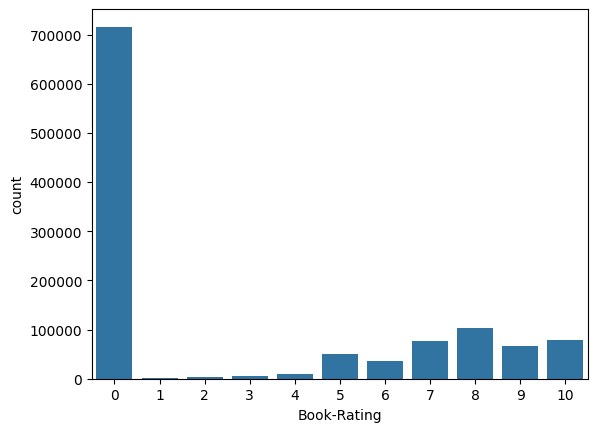

In [ ]:
# Vẽ biểu đồ cột thể hiện số lượng cho từng giá trị ratings trên
sn.countplot(book_ratings, x=book_ratings['Book-Rating'])

In [ ]:
# sắp xếp danh sách ratings theo chiều tăng dần, giảm dần theo giá trị rating
book_ratings.sort_values(['Book-Rating'], ascending=True)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
687400,167471,0806515082,0
687402,167471,0806958855,0
687403,167471,080698323X,0
687407,167471,0811841405,0
...,...,...,...
272376,63625,0316168815,10
222656,52044,0486287297,10
272375,63625,0312147015,10
406256,98391,0312252617,10


In [ ]:
book_ratings.sort_values(['Book-Rating'], ascending=False)

,User-ID,ISBN,Book-Rating
714920,173291,0590460609,10
439695,105221,0590353403,10
439659,105214,1573220221,10
113491,26421,1558743669,10
439664,105221,0064407667,10
...,...,...,...
484342,115120,0671026852,0
484343,115120,0671026860,0
484344,115120,0671027514,0
484345,115120,0671027522,0


In [ ]:
# đếm xem có bao nhiều người tham gia đánh giá
book_ratings.groupby('User-ID').count()['ISBN'].count()

105283

In [ ]:
# Đếm xem có bao nhiêu cuốn sách được đánh giá
book_ratings.groupby('ISBN').count()['Book-Rating'].count()

340556

In [ ]:
# Tính xem trung bình mỗi người rating bao nhiêu cuốn sách
book_ratings.groupby('User-ID')['Book-Rating'].count().mean()


10.920851419507423

In [ ]:
# Tính xem mỗi bộ phim có bao nhiêu lượt rating
book_ratings.groupby('ISBN')['Book-Rating'].count()

,Book-Rating
ISBN,
0330299891,2
0375404120,2
0586045007,1
9022906116,2
9032803328,1
...,...
cn113107,1
ooo7156103,1
§423350229,1


In [ ]:
# groupby bảng ratings theo "ISBN" và tính rating trung bình cho từng cuốn sách
book_ratings.groupby('ISBN')['Book-Rating'].mean()

,Book-Rating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0
...,...
cn113107,0.0
ooo7156103,7.0
§423350229,0.0


In [ ]:
book_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
# Tìm tên 10 cuốn sách có rating trung bình thấp nhất
lowest_idx = book_ratings.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=True).head().index.values

books.loc[books['ISBN'].isin(lowest_idx)]['Book-Title']

,Book-Title
109663,City Dharma : Keeping Your Cool in the Chaos
212158,Color Dictionary of Flowers and Plants Compact
212361,A Dictionary of Opera and Song Themes: Includi...
248192,The Upside Down Riddle Book
252120,The truth about fiber in your food


In [ ]:
# Tìm tên 10 cuốn sách có rating trung bình cao nhất
lowest_idx = book_ratings.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=False).head().index.values

books.loc[books['ISBN'].isin(lowest_idx)]['Book-Title']

,Book-Title
180278,The Kid Who Ran for President
181317,"10 Real SATs, Third Edition"
209301,ANIMAL KNITS


In [ ]:
# merge bảng ratings, và books theo cột "ISBN"
book_ratings.merge(books, on='ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "User-ID" và các hàng là "ISBN" (*)
pivot = book_ratings[:70000].pivot(index='ISBN' , columns="User-ID", values="Book-Rating").fillna(0)
pivot

User-ID,2,7,8,9,10,12,14,16,17,19,...,278832,278836,278838,278843,278844,278846,278849,278851,278852,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
9022906116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 7336 1053 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 75280 122 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 907 062 008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/330/25864/8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZR903CX0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\0210000010""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# chuyển (*) sang numpy.ndarray (như ma trân rating) (**)
pivoted_mtr = pivot.to_numpy()
pivoted_mtr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Nhân ma ma trận trên với 2.5
print(pivoted_mtr * 2.5)
print('\n\n')
# Cộng ma ma trận trên với 1
print(pivoted_mtr + 1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [ ]:
# lấy ra dòng đầu tiên trong (*) và chuyển sang numpy.ndarray (như vector cho ISBN = 034545104X)
mtr1 = pivot.loc['0 7336 1053 6'].to_numpy()
# lấy ra dòng thứ 2 trong (*) và chuyển sang numpy.ndarray (như vector cho ISBN = 155061224)
mtr2 = pivot.loc['ZR903CX0003'].to_numpy()
# tính tích vô hướng của hai vector trên
mtr1@mtr2

0.0

In [ ]:
# tính giá trị cosine giữa hai vector trên
from scipy.linalg import norm
(mtr1 @ mtr2) / (norm(mtr1) * norm(mtr2))

<ipython-input-36-2c8c805f408a>:3: RuntimeWarning: invalid value encountered in scalar divide
  (mtr1 @ mtr2) / (norm(mtr1) * norm(mtr2))


nan

In [ ]:
# tích của vector ISBN = 155061224 với ma trận (**)
mtr2 * pivoted_mtr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])